In [2]:
#import libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam



C:\Users\Ravi\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [4]:
PATH = os.getcwd()
PATH

'C:\\Users\\Ravi'

In [14]:
PATH1=os.chdir('C:/Users/Ravi/selectivesearch/example/')
PATH1

In [15]:
PATH = os.getcwd()
PATH

'C:\\Users\\Ravi\\selectivesearch\\example'

In [16]:
# Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1
num_epoch=20


In [17]:
# Define the number of classes
num_classes = 4

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)


Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-horses

Loaded the images of dataset-Humans

(808, 128, 128)


In [18]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(808, 1, 128, 128)


In [19]:
# Assigning Labels

# Define the number of classes
num_classes = 4

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:]=3
	  
names = ['cats','dogs','horses','humans']
	  

In [20]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [21]:
#%%
# Defining the model
input_shape=img_data[0].shape
					
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))



C:\Users\Ravi\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", input_shape=(1, 128, 1...)`
  import sys
C:\Users\Ravi\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if __name__ == '__main__':
C:\Users\Ravi\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


In [23]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])


In [25]:
# Viewing model_configuration

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 128, 128)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 128, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 126, 126)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 126, 126)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 63, 63)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 63, 63)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 61, 61)        18496     
__________

In [27]:
model.get_config()

[{'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'batch_input_shape': (None, 1, 128, 128),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'data_format': 'channels_first',
   'dilation_rate': (1, 1),
   'dtype': 'float32',
   'filters': 32,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'kernel_size': (3, 3),
   'name': 'conv2d_1',
   'padding': 'same',
   'strides': (1, 1),
   'trainable': True,
   'use_bias': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_1', 'trainable': True}},
 {'class_name': 'Conv2D',
  'config': {'activation': 'linear',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name':

In [28]:
model.layers[0].get_config()

{'activation': 'linear',
 'activity_regularizer': None,
 'batch_input_shape': (None, 1, 128, 128),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_first',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 32,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'conv2d_1',
 'padding': 'same',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [29]:
model.layers[0].input_shape

(None, 1, 128, 128)

In [30]:
model.layers[0].output_shape

(None, 32, 128, 128)

In [31]:
model.layers[0].get_weights()

[array([[[[-0.05340984, -0.07683928, -0.00917482,  0.11797442,  0.12447853,
            0.05183147,  0.02655923,  0.08867535,  0.00801182, -0.02904572,
            0.00074284,  0.0030299 ,  0.04485488,  0.09945698,  0.10692954,
            0.03521176,  0.09911086, -0.04238687, -0.02101158, -0.09686524,
            0.04808398, -0.10530715, -0.09449543,  0.08536646, -0.08092375,
           -0.03095507, -0.00646658,  0.09246476,  0.13681208, -0.12703077,
           -0.07469878,  0.00600886]],
 
         [[-0.13516821,  0.03955223,  0.04599495,  0.13873915, -0.01807073,
           -0.09981452,  0.00681321,  0.0559275 , -0.03292816,  0.07701658,
           -0.12703572,  0.13947506,  0.13114123, -0.07966711,  0.06073689,
            0.01932681, -0.02911244, -0.03190487,  0.02221495, -0.079687  ,
            0.07188864, -0.0112301 , -0.06022181, -0.0490257 ,  0.0890573 ,
            0.13057698,  0.0666112 , -0.0330713 ,  0.10066994,  0.05037713,
           -0.09611918,  0.00675818]],
 
      

In [32]:
np.shape(model.layers[0].get_weights()[0])

(3, 3, 1, 32)

In [33]:
model.layers[0].trainable

True

In [34]:
#%%
# Training
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

#hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20,verbose=1, validation_split=0.2)

C:\Users\Ravi\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 135s 209ms/step - loss: 1.5274 - acc: 0.2430 - val_loss: 1.3875 - val_acc: 0.2778
Epoch 2/20
646/646 [==============================] - 135s 209ms/step - loss: 1.3804 - acc: 0.3359 - val_loss: 1.3023 - val_acc: 0.4259
Epoch 3/20
646/646 [==============================] - 135s 209ms/step - loss: 1.2477 - acc: 0.4334 - val_loss: 1.2833 - val_acc: 0.4815
Epoch 4/20
646/646 [==============================] - 133s 207ms/step - loss: 1.1376 - acc: 0.5031 - val_loss: 1.3558 - val_acc: 0.3519
Epoch 5/20
646/646 [==============================] - 132s 204ms/step - loss: 1.0266 - acc: 0.5573 - val_loss: 1.1716 - val_acc: 0.5309
Epoch 6/20
646/646 [==============================] - 134s 207ms/step - loss: 0.9141 - acc: 0.5929 - val_loss: 1.1193 - val_acc: 0.5123
Epoch 7/20
646/646 [==============================] - 138s 214ms/step - loss: 0.8209 - acc: 0.6517 - val_loss: 1.1694 - val_acc: 0.5432
Ep

In [37]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)



C:\Users\Ravi\Anaconda3\envs\tensorflow_env\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 646 samples, validate on 162 samples
Epoch 1/20
646/646 [==============================] - 130s 201ms/step - loss: 0.2239 - acc: 0.9164 - val_loss: 1.8829 - val_acc: 0.4877
Epoch 2/20
646/646 [==============================] - 128s 198ms/step - loss: 0.2066 - acc: 0.9303 - val_loss: 2.6916 - val_acc: 0.5123


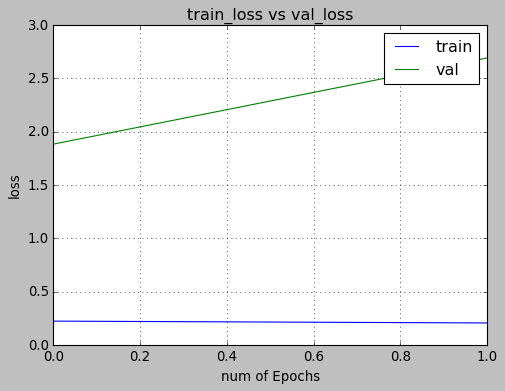

In [62]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(2)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)


plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

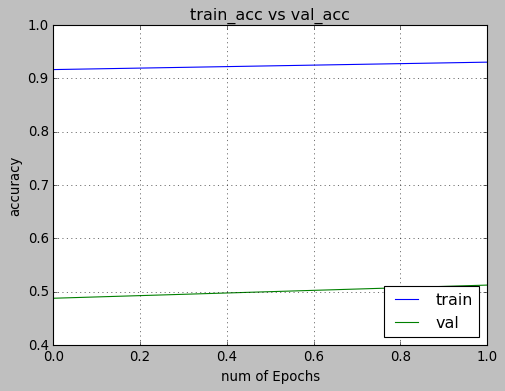

In [63]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

In [42]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 2.69164288228
Test accuracy: 0.512345679012
(1, 1, 128, 128)
[[  3.01633274e-09   2.43426507e-06   9.99989033e-01   8.55847884e-06]]
[2]
[[ 0.  0.  1.  0.]]


In [43]:
# Testing a new image
test_image = cv2.imread('data/Humans/rider-8.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   

(128, 128)


In [44]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)

(1, 1, 128, 128)


In [45]:
# Predicting the test image
print((model.predict(test_image)))
print(model.predict_classes(test_image))

[[  1.45632441e-07   1.80209427e-05   6.68524626e-06   9.99975204e-01]]
[3]


In [64]:
# Visualizing the intermediate layer

#
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

(1, 1, 32, 126, 126)
(32, 126, 126)
(126, 126, 32)


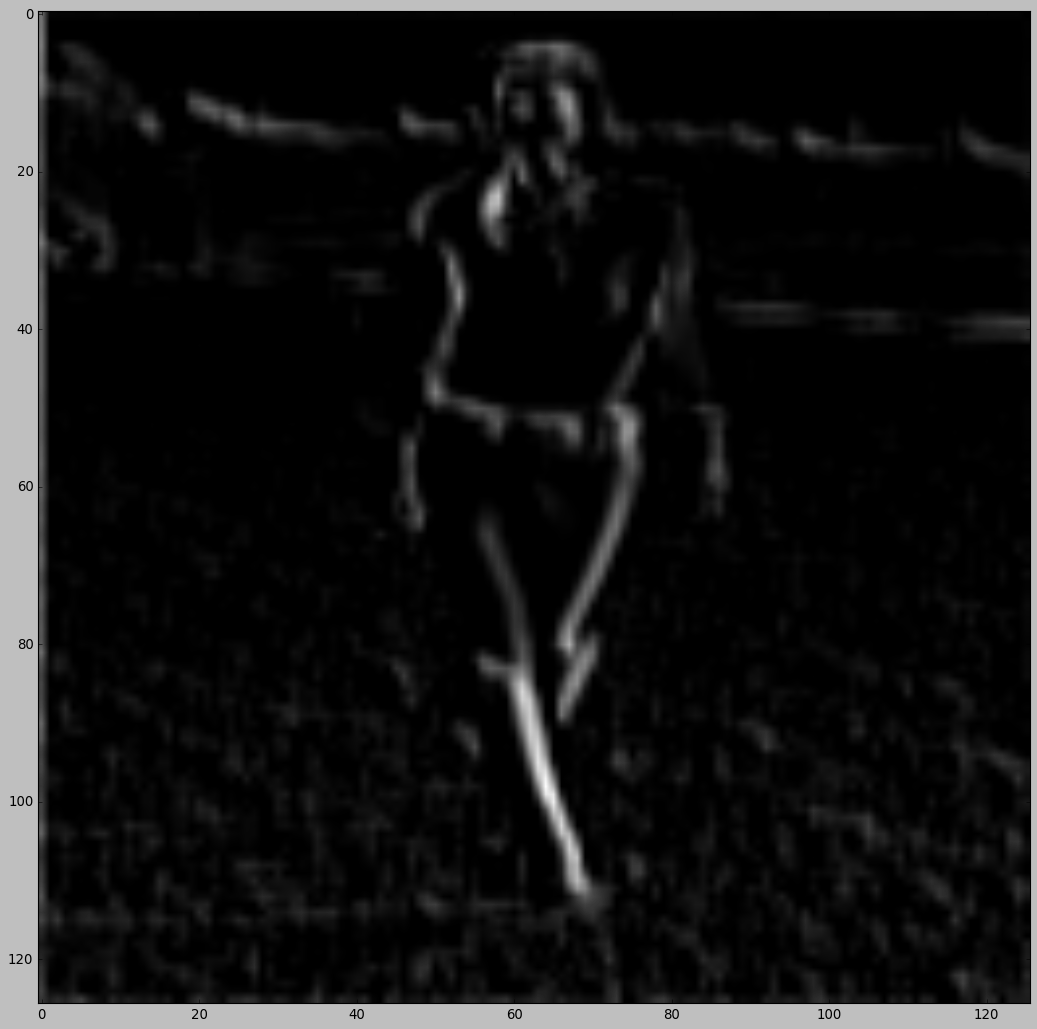

In [67]:
layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')
plt.show()

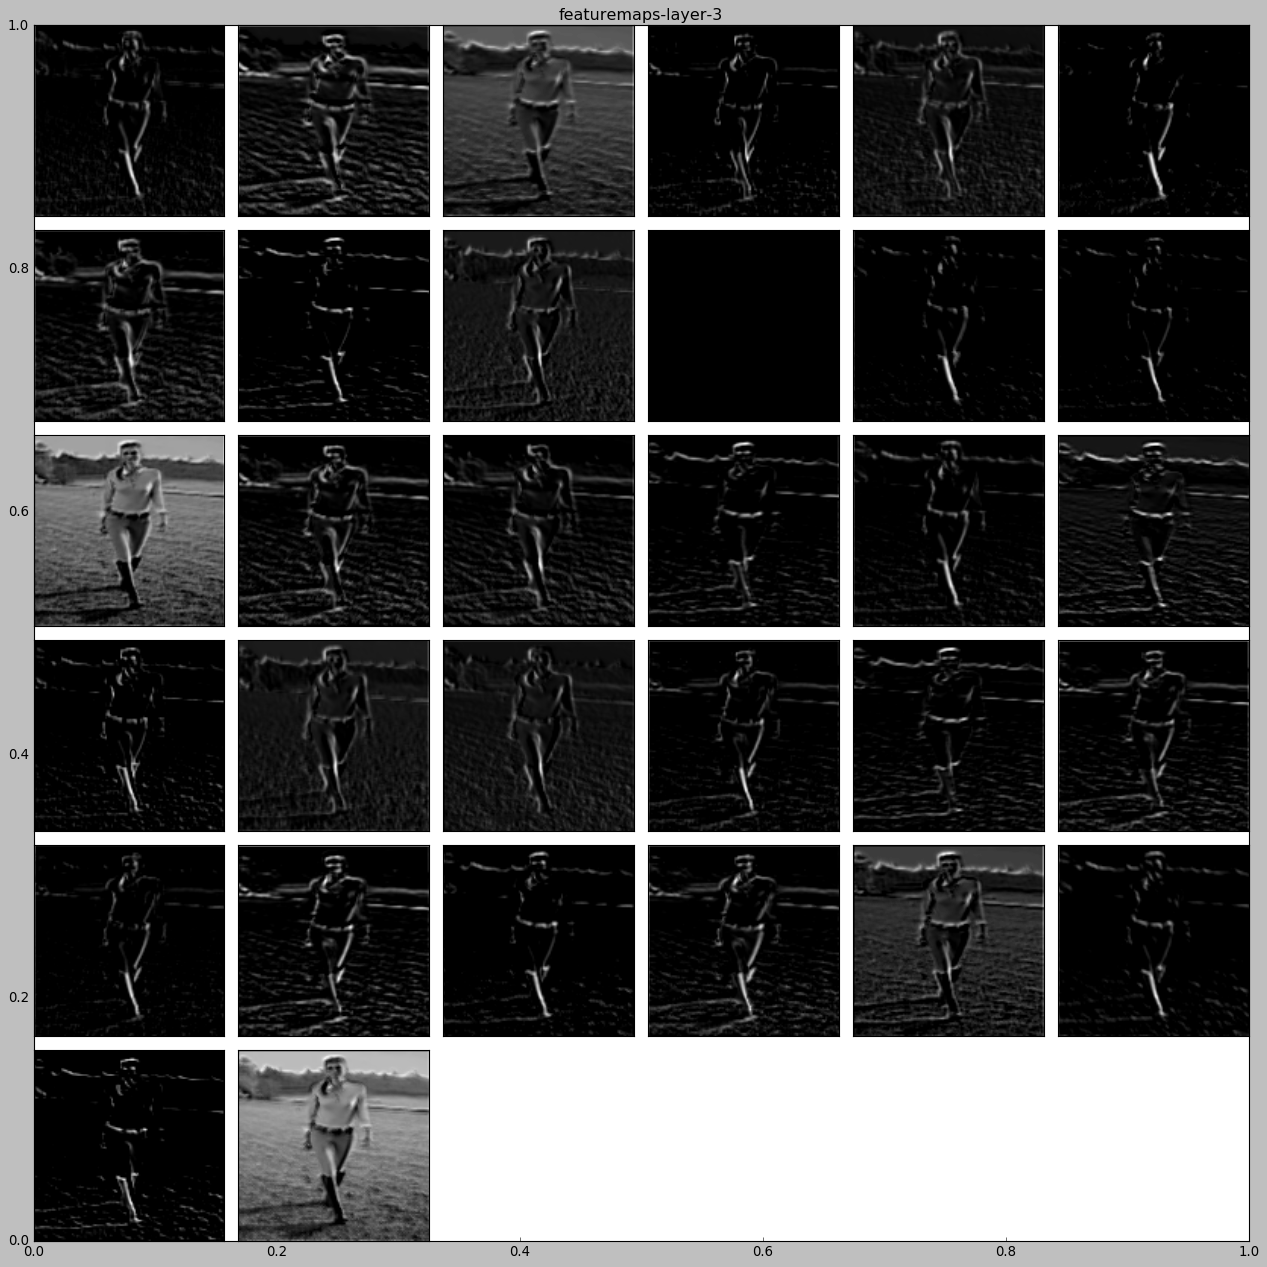

In [68]:
num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i],cmap='gray')
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

#%%

In [70]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(cats)', 'class 1(Dogs)', 'class 2(Horses)','class 3(Humans)']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


[[  3.02e-09   2.43e-06   1.00e+00   8.56e-06]
 [  3.67e-02   2.54e-01   6.17e-01   9.20e-02]
 [  8.09e-03   2.56e-02   9.66e-01   5.91e-04]
 [  9.98e-01   1.61e-03   1.20e-05   8.59e-08]
 [  9.17e-04   1.07e-01   4.97e-01   3.95e-01]
 [  1.68e-02   9.66e-01   1.04e-02   7.29e-03]
 [  3.18e-05   7.50e-01   6.47e-06   2.50e-01]
 [  4.00e-03   1.60e-04   9.96e-01   3.05e-10]
 [  5.06e-07   1.00e+00   3.22e-06   1.09e-04]
 [  3.12e-12   8.48e-06   1.60e-10   1.00e+00]
 [  3.96e-04   2.83e-02   9.68e-01   3.78e-03]
 [  6.35e-13   9.07e-06   1.00e-10   1.00e+00]
 [  7.04e-06   1.38e-04   2.34e-06   1.00e+00]
 [  3.41e-08   1.06e-04   7.02e-11   1.00e+00]
 [  4.34e-07   2.25e-03   9.50e-01   4.80e-02]
 [  4.25e-04   6.89e-01   3.02e-01   8.77e-03]
 [  5.48e-03   5.18e-01   2.29e-02   4.53e-01]
 [  1.56e-02   9.59e-01   2.50e-02   4.13e-04]
 [  3.21e-18   1.27e-13   1.51e-12   1.00e+00]
 [  1.46e-04   2.94e-01   1.36e-01   5.70e-01]
 [  4.94e-02   6.73e-01   8.96e-02   1.88e-01]
 [  1.94e-19 

In [71]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 8 22  3  8]
 [ 3 20 10  7]
 [ 0  2 23  8]
 [ 0 10  6 32]]


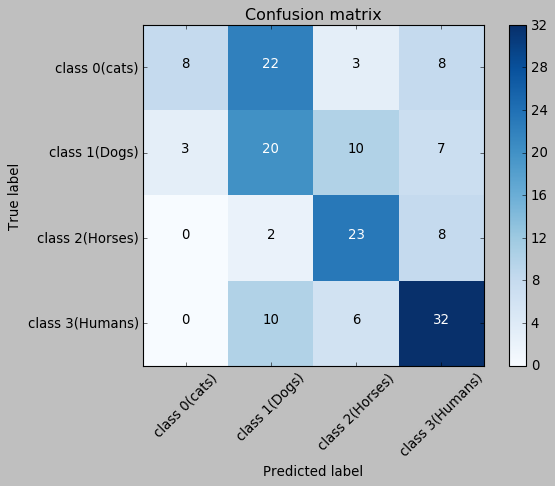

In [49]:
# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()

In [72]:
#%%
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

Saved model to disk
Loaded model from disk
